In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Add this line

import os 

### Define constants

In [2]:
Wq_Ar = 0.0195 # keV/quantum

driftField = 200 # V/cm
CBox_ER = 9.2 # V/cm

gamma_ER_Ar = CBox_ER/driftField

p0 = 0.11
p1 = 1.71


In [3]:
def primary_ionization_yield(Eer):
    # Eer is the energy of the primary particle, in keV
    # Return the number of ion/electron pairs, before recombination
    return 52.7*Eer

def recombination_probability(Ni): 
    # Ni is the primary ion/electron pairs number, a dimensionless quantity, obtained by yields
    # gamma_ER_Ar is the recombination coefficient
    return 1 - (1/(gamma_ER_Ar*Ni)*np.log(1 + gamma_ER_Ar*Ni))


def Ar39_modification_factor(Eer):
    return gamma_ER_Ar*p0*Eer**p1


def totalChargeYieldExpectationRaw(Eer):
    yield_Ar39 = primary_ionization_yield(Eer)
    prob_survival = 1 - recombination_probability(yield_Ar39)
    return yield_Ar39*prob_survival / Eer



def totalChargeYieldExpectation(Eer):
    yield_Ar39 = primary_ionization_yield(Eer) * (1 + Ar39_modification_factor(Eer))
    prob_survival = 1 - recombination_probability(primary_ionization_yield(Eer))
    return yield_Ar39*prob_survival / Eer



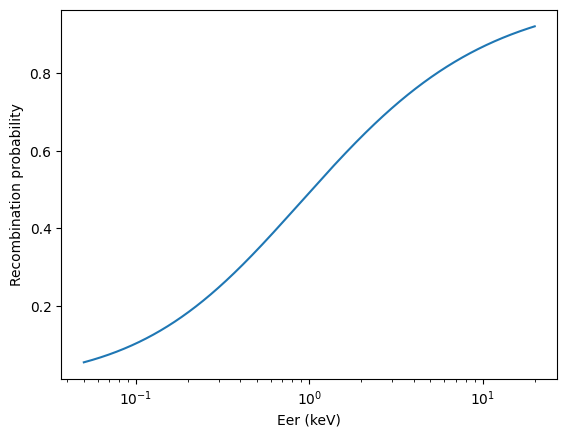

In [4]:
fig, ax = plt.subplots()
ax.plot(np.geomspace(0.05, 20, 5000), recombination_probability(primary_ionization_yield(np.geomspace(0.05, 20, 5000))))
ax.set_xscale("log")
ax.set_xlabel("Eer (keV)")
ax.set_ylabel("Recombination probability")
plt.show()


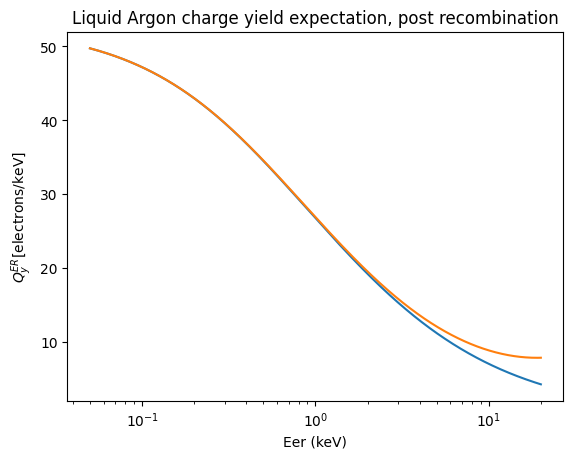

In [5]:
fig, ax = plt.subplots()
ax.plot(np.geomspace(0.05, 20, 5000), totalChargeYieldExpectationRaw(np.geomspace(0.05, 20, 5000)))
ax.plot(np.geomspace(0.05, 20, 5000), totalChargeYieldExpectation(np.geomspace(0.05, 20, 5000)))

ax.set_xscale("log")
ax.set_xlabel("Eer (keV)")
ax.set_ylabel(r"$Q_y^{ER}$[electrons/keV]")
ax.set_title("Liquid Argon charge yield expectation, post recombination")
plt.show()


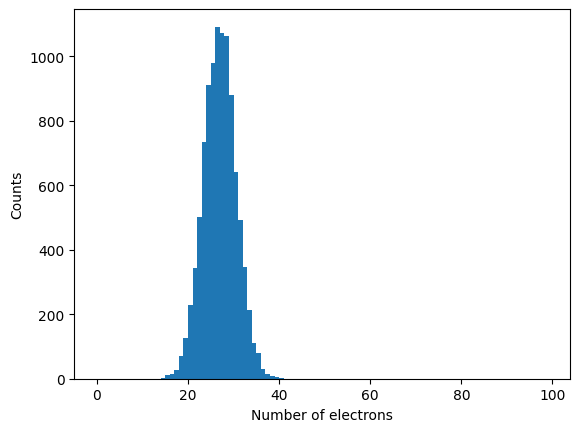

In [6]:
def energyToElectrons_ER(Eer, rng=np.random.default_rng()):
    # Calculate initial quanta before recombination
    initial_quanta = primary_ionization_yield(Eer) * (1 + Ar39_modification_factor(Eer))
    # Apply binomial fluctuation in recombination
    prob_survival = 1 - recombination_probability(primary_ionization_yield(Eer))
    return rng.binomial(n=int(initial_quanta), p=prob_survival)

E_test = 1 # keV

nElectrons = []
for i in range(10000):
    nElectrons.append(energyToElectrons_ER(E_test))

plt.hist(nElectrons, bins=np.arange(0, 100, 1))
plt.xlabel("Number of electrons")
plt.ylabel("Counts")
plt.show()


### NR yields model


In [7]:
beta_NR = 6800
fZ = 0.953

def epsilon_NR(Enr):
    return 0.0135*Enr

def stoppingPowerE(epsilon):
    return 0.145*np.sqrt(epsilon)

def stoppingPowerN(epsilon):
    return np.log(1 + 1.1383 * fZ * epsilon) / (2*(fZ*epsilon + 0.01321*(fZ*epsilon)**0.21226 + 0.19593*(fZ*epsilon)**0.5))

def primaryIonNumberNR(Enr):
    return beta_NR * (epsilon_NR(Enr) * stoppingPowerE(epsilon_NR(Enr)))/(stoppingPowerE(epsilon_NR(Enr)) + stoppingPowerN(epsilon_NR(Enr)))

def postRecombinationPrimaryIonNumberNR(Enr):
    prob_survival = 1 - recombination_probability(primaryIonNumberNR(Enr))
    return primaryIonNumberNR(Enr) * prob_survival


primaryIonNumberNR(5)

52.60182898549182

In [11]:
eTicks = np.linspace(0.1, 10, 100)
for eTick in eTicks:
    print(f"{eTick:.2f}, {primaryIonNumberNR(eTick):.2f}, {postRecombinationPrimaryIonNumberNR(eTick):.2f} \\")


0.10, 0.71, 0.70 \
0.20, 1.42, 1.37 \
0.30, 2.15, 2.05 \
0.40, 2.90, 2.72 \
0.50, 3.68, 3.40 \
0.60, 4.47, 4.07 \
0.70, 5.29, 4.74 \
0.80, 6.13, 5.40 \
0.90, 6.98, 6.05 \
1.00, 7.85, 6.70 \
1.10, 8.73, 7.34 \
1.20, 9.63, 7.97 \
1.30, 10.55, 8.60 \
1.40, 11.48, 9.22 \
1.50, 12.43, 9.83 \
1.60, 13.39, 10.43 \
1.70, 14.36, 11.02 \
1.80, 15.34, 11.61 \
1.90, 16.34, 12.19 \
2.00, 17.35, 12.76 \
2.10, 18.38, 13.32 \
2.20, 19.41, 13.87 \
2.30, 20.46, 14.42 \
2.40, 21.52, 14.96 \
2.50, 22.59, 15.49 \
2.60, 23.67, 16.01 \
2.70, 24.76, 16.53 \
2.80, 25.86, 17.04 \
2.90, 26.97, 17.54 \
3.00, 28.10, 18.04 \
3.10, 29.23, 18.53 \
3.20, 30.38, 19.01 \
3.30, 31.53, 19.48 \
3.40, 32.70, 19.95 \
3.50, 33.87, 20.42 \
3.60, 35.06, 20.88 \
3.70, 36.25, 21.33 \
3.80, 37.45, 21.78 \
3.90, 38.67, 22.22 \
4.00, 39.89, 22.65 \
4.10, 41.12, 23.08 \
4.20, 42.36, 23.51 \
4.30, 43.61, 23.93 \
4.40, 44.87, 24.34 \
4.50, 46.14, 24.75 \
4.60, 47.41, 25.16 \
4.70, 48.70, 25.56 \
4.80, 49.99, 25.95 \
4.90, 51.29, 26.34 

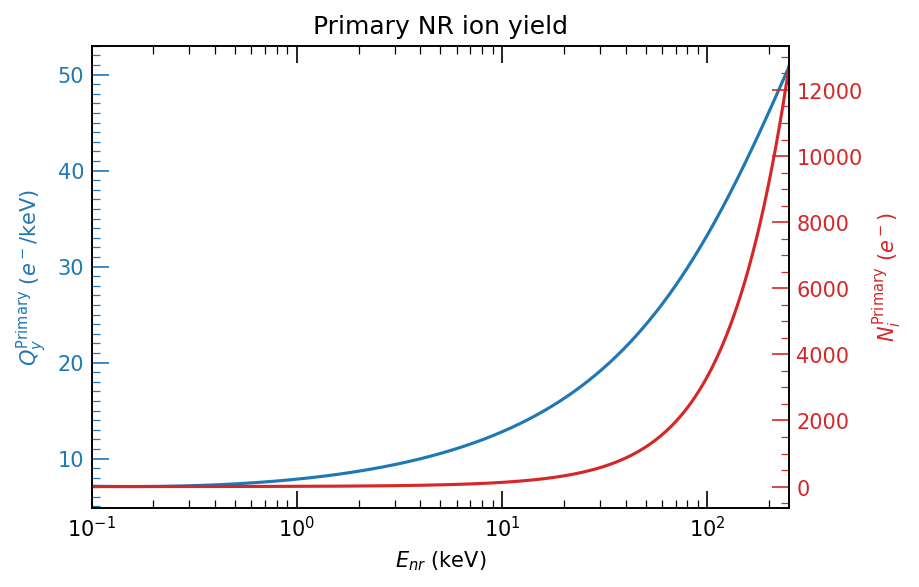

In [20]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
ax.plot(
    np.geomspace(0.1, 250, 5000), 
    primaryIonNumberNR(np.geomspace(0.1, 250, 5000))/np.geomspace(0.1, 250, 5000),
    color='tab:blue')
ax.set_xscale("log")
ax.set_xlabel(r"$E_{nr}$ (keV)")
ax.set_ylabel(r"$Q_y^\text{Primary}$ ($e^-$/keV)", color='tab:blue')
ax.set_title("Primary NR ion yield")
# ax.set_yscale("log")

ax.set_xlim(0.1, 250)

ax.tick_params(axis='y', direction='in', length=8, right=True, color='tab:blue', labelcolor='tab:blue')
ax.tick_params(axis='y', which='minor', direction='in', length=4, right=True, color='tab:blue', labelcolor='tab:blue')
ax.tick_params(axis='x', direction='in', length=8, top=True)
ax.tick_params(axis='x', which='minor', direction='in', length=4, top=True)

ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))


ax2 = ax.twinx()
ax2.plot(np.geomspace(0.1, 250, 5000), 
         primaryIonNumberNR(np.geomspace(0.1, 250, 5000)),
         color="tab:red")
ax2.set_ylabel(r"$N_i^\text{Primary}$ ($e^-$)", color="tab:red")
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.tick_params(axis='y', direction='in', length=8, right=True, color='tab:red', labelcolor='tab:red')
ax2.tick_params(axis='y', which='minor', direction='in', length=4, right=True, color='tab:red', labelcolor='tab:red')
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(500))

plt.show()


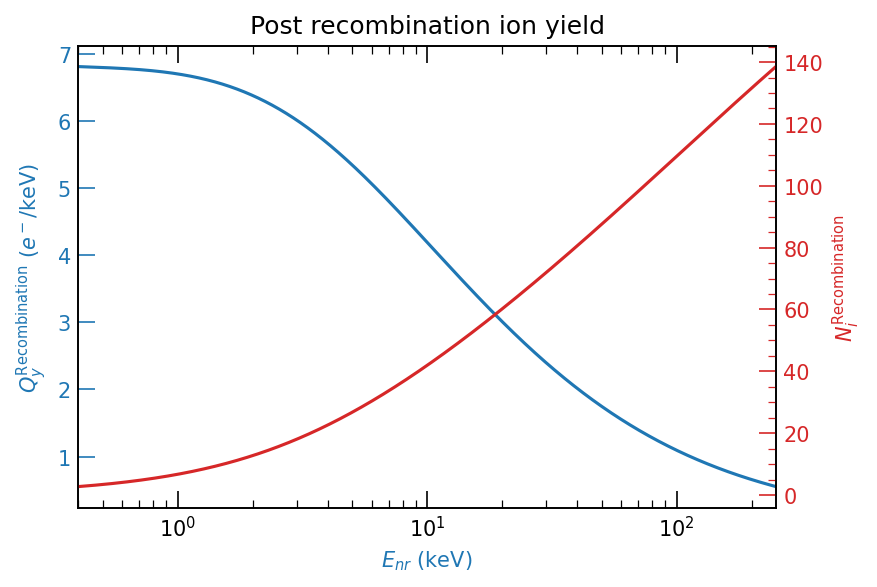

In [67]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
ax.plot(np.geomspace(0.4, 250, 5000), 
        postRecombinationPrimaryIonNumberNR(np.geomspace(0.4, 250, 5000))/np.geomspace(0.4, 250, 5000),
        color='tab:blue')

ax.set_xscale("log")
ax.set_xlabel(r"$E_{nr}$ (keV)", color='tab:blue')
ax.set_ylabel(r"$Q_y^\text{Recombination}$ ($e^-$/keV)", color='tab:blue')
ax.set_title("Post recombination ion yield")
# ax.set_yscale("log")

ax.tick_params(axis='y', direction='in', length=8, right=True, color = 'tab:blue', labelcolor='tab:blue')
ax.tick_params(axis='y', which='minor', direction='in', length=4, right=True, color = 'tab:blue', labelcolor='tab:blue')
ax.tick_params(axis='x', direction='in', length=8, top=True)
ax.tick_params(axis='x', which='minor', direction='in', length=4, top=True)

ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.set_xlim(0.4, 250)

ax2 = ax.twinx()
ax2.plot(np.geomspace(0.4, 250, 5000), 
         postRecombinationPrimaryIonNumberNR(np.geomspace(0.4, 250, 5000)),
         color="tab:red")
ax2.set_ylabel(r"$N_i^\text{Recombination}$ ", color="tab:red")
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.tick_params(axis='y', direction='in', length=8, right=True, color='tab:red', labelcolor='tab:red')
ax2.tick_params(axis='y', which='minor', direction='in', length=4, right=True, color='tab:red', labelcolor='tab:red')
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(5))

plt.show()

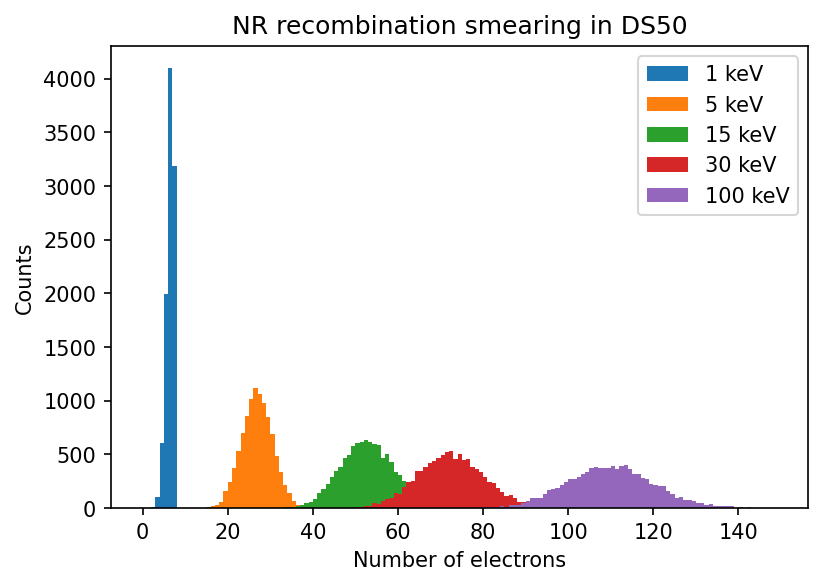

In [68]:
def energyToElectrons_NR(Enr, rng=np.random.default_rng()):
    # Calculate initial quanta before recombination for NR
    initial_quanta = primaryIonNumberNR(Enr)
    # Apply binomial fluctuation in recombination
    prob_survival = 1 - recombination_probability(primaryIonNumberNR(Enr))
    return rng.binomial(n=int(initial_quanta), p=prob_survival)

# Test the NR electron yield
E_test_NR = 1 # keV

nElectrons_NR_1keV = []
nElectrons_NR_5keV = []
nElectrons_NR_15keV = []
nElectrons_NR_30keV = []
nElectrons_NR_100keV = []


for i in range(10000):
    nElectrons_NR_1keV.append(energyToElectrons_NR(1))
    nElectrons_NR_5keV.append(energyToElectrons_NR(5))
    nElectrons_NR_15keV.append(energyToElectrons_NR(15))
    nElectrons_NR_30keV.append(energyToElectrons_NR(30))
    nElectrons_NR_100keV.append(energyToElectrons_NR(100))

fig, ax = plt.subplots(figsize=(6, 4),dpi=150)
ax.hist(nElectrons_NR_1keV, bins=np.arange(0, 150, 1), label="1 keV")
ax.hist(nElectrons_NR_5keV, bins=np.arange(0, 150, 1), label="5 keV")
ax.hist(nElectrons_NR_15keV, bins=np.arange(0, 150, 1), label="15 keV")
ax.hist(nElectrons_NR_30keV, bins=np.arange(0, 150, 1), label="30 keV")
ax.hist(nElectrons_NR_100keV, bins=np.arange(0, 150, 1), label="100 keV")
ax.set_xlabel("Number of electrons")
ax.set_ylabel("Counts")
ax.set_title("NR recombination smearing in DS50")
ax.legend()
plt.show()


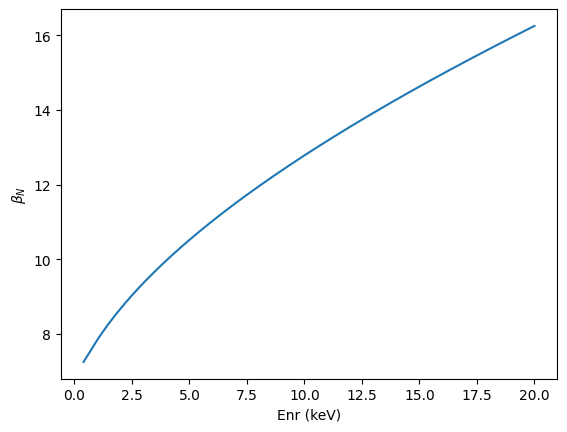

In [56]:
fig, ax = plt.subplots()
ax.plot(np.geomspace(0.4, 20, 5000), primaryIonNumberNR(np.geomspace(0.4, 20, 5000))/np.geomspace(0.4, 20, 5000))
# ax.set_xscale("log")
ax.set_xlabel("Enr (keV)")
ax.set_ylabel(r"$\beta_N$")
plt.show()

In [182]:
LArEventRate_SPS = np.loadtxt("LArEventRate_S-PS.txt", delimiter=",")


In [187]:
# Calculate total event rate by numerical integration using numpy trapz
total_event_rate = 0.001*np.trapz(y=LArEventRate_SPS[:,1], x=LArEventRate_SPS[:,0])
print(f"Total event rate: {total_event_rate:.4f} events/ton/year")


Total event rate: 0.1378 events/ton/year


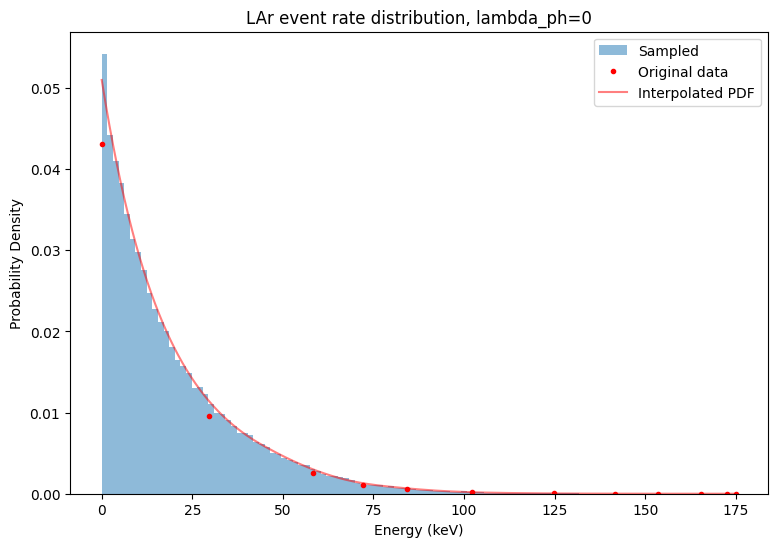

In [188]:
# Create interpolation function from the data points for sampling
from scipy.interpolate import interp1d

# Get x and y values from data
x = LArEventRate_SPS[:,0]
y = LArEventRate_SPS[:,1]

# Create interpolation of original data (in log space since distribution spans many orders of magnitude)
log_interp = interp1d(x, np.log(y), bounds_error=False, fill_value=-np.inf, kind="quadratic")

# Create fine grid for more accurate PDF
x_fine = np.linspace(x.min(), x.max(), 1000)
y_fine = np.exp(log_interp(x_fine))

# Normalize to create proper PDF
pdf = y_fine / np.trapz(y_fine, x_fine)

# Create CDF
cdf = np.cumsum(pdf)
cdf = cdf / cdf[-1]

# Create inverse CDF interpolation
inverse_cdf = interp1d(cdf, x_fine, bounds_error=False, fill_value=(x_fine[0], x_fine[-1]))

# Generate samples
n_samples = 100000
uniform_samples = np.random.uniform(0, 1, n_samples)
energy_samples = inverse_cdf(uniform_samples)

# Plot comparison
fig, ax = plt.subplots(figsize=(9,6))
# Plot histogram of samples with many bins to show fine structure
ax.hist(energy_samples, bins=100, density=True, alpha=0.5, label='Sampled')
# Plot original data points
ax.plot(x, y/np.trapz(y, x), 'r.', label='Original data')
# Plot interpolated PDF
ax.plot(x_fine, pdf, 'r-', alpha=0.5, label='Interpolated PDF')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Probability Density')
ax.set_title("LAr event rate distribution, lambda_ph=0")
# ax.set_yscale('log')
ax.legend()
plt.show()



24328.425031829665
130


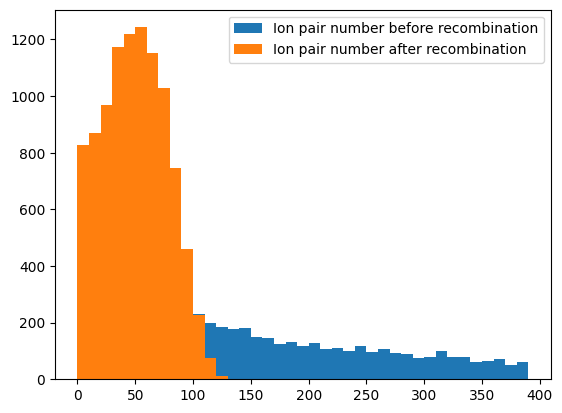

In [201]:
print(primaryIonNumberNR(400))
print(energyToElectrons_NR(400))


NPrimaryIon = []
NIonPostRecombination = []
for i in range(10000):
    NPrimaryIon.append(primaryIonNumberNR(energy_samples[i]))
    NIonPostRecombination.append(energyToElectrons_NR(energy_samples[i]))
plt.hist(NPrimaryIon, bins=np.arange(0, 400, 10), label="Ion pair number before recombination")
plt.hist(NIonPostRecombination, bins=np.arange(0, 400, 10), label="Ion pair number after recombination")
plt.legend()
plt.show()
